<a href="https://colab.research.google.com/github/laresamdeola/Machine-Learning/blob/main/crime_rate_US_data_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('crime_data.csv')
data.head()

,state,county,community,community_name,fold,population,household_size,racepctblack,racepctwhite,racepctasian,...,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,violentcrimesperpopulation
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [ ]:
data.corr()

,state,fold,population,household_size,racepctblack,racepctwhite,racepctasian,racepcthispanic,agepct12t21,agepct12t29,...,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 125,violentcrimesperpopulation
state,1.000000,-0.002857,-0.079569,-0.049505,-0.046154,0.213990,-0.318602,-0.210841,0.100622,0.036950,...,-0.356149,0.340611,0.151854,0.062087,0.127616,-0.040350,-0.137940,-0.021431,-0.075305,-0.211398
fold,-0.002857,1.000000,-0.007552,0.035488,0.003524,-0.004436,-0.001317,0.000915,-0.000151,0.007080,...,-0.000195,-0.025403,-0.021956,-0.035202,-0.027938,0.017846,-0.012570,-0.000541,-0.023780,-0.032577
population,-0.079569,-0.007552,1.000000,-0.046148,0.231178,-0.300845,0.181603,0.156218,0.006368,0.130344,...,0.172731,-0.125133,-0.123691,0.001610,-0.089638,0.713652,0.231897,0.270356,0.466352,0.367157
household_size,-0.049505,0.035488,-0.046148,1.000000,-0.067109,-0.235907,0.201996,0.468659,0.520461,0.367338,...,0.311107,-0.049253,-0.057842,-0.103109,-0.003277,-0.015078,-0.004072,-0.051506,-0.094368,-0.034923
racepctblack,-0.046154,0.003524,0.231178,-0.067109,1.000000,-0.794389,-0.106738,-0.066581,0.122338,0.153475,...,-0.098114,0.093494,-0.045646,0.056358,-0.002894,0.149758,0.095053,0.147023,0.260793,0.631264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Unnamed: 118,-0.040350,0.017846,0.713652,-0.015078,0.149758,-0.131389,-0.001084,0.011634,0.025736,0.062476,...,-0.048845,-0.069273,-0.116901,-0.062989,-0.104403,1.000000,-0.170856,0.007699,0.299632,0.196800
Unnamed: 119,-0.137940,-0.012570,0.231897,-0.004072,0.095053,-0.337458,0.389944,0.370103,-0.095749,0.119725,...,0.614772,-0.221341,0.020701,0.118082,-0.012166,-0.170856,1.000000,0.587804,0.228084,0.281390
Unnamed: 120,-0.021431,-0.000541,0.270356,-0.051506,0.147023,-0.215636,0.296921,0.078366,-0.173279,-0.023507,...,0.401711,-0.175459,0.192367,0.081260,-0.042424,0.007699,0.587804,1.000000,0.206644,0.153829
Unnamed: 125,-0.075305,-0.023780,0.466352,-0.094368,0.260793,-0.276234,0.101888,0.125353,0.001301,0.117290,...,0.170946,-0.134230,-0.090249,0.008227,-0.107289,0.299632,0.228084,0.206644,1.000000,0.348627


In [ ]:
features = [5,7,10]
X = data.iloc[:, features].values
y = data.iloc[:, -1].values
y = y.reshape(-1, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
predicted_crimes = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((predicted_crimes.reshape(len(predicted_crimes),1), y_test.reshape(len(y_test),1)),1))
print(regressor.coef_)
print(regressor.intercept_)

[[0.11 0.45]
 [0.17 0.06]
 [0.24 0.26]
 [0.14 0.09]
 [0.21 0.33]
 [0.14 0.16]
 [0.37 0.23]
 [0.21 0.17]
 [0.21 0.14]
 [0.09 0.15]
 [0.1  0.04]
 [0.41 0.62]
 [0.11 0.05]
 [0.1  0.09]
 [0.31 0.28]
 [0.29 0.12]
 [0.13 0.22]
 [0.13 0.2 ]
 [0.42 0.27]
 [0.22 0.53]
 [0.09 0.08]
 [0.68 0.71]
 [0.22 0.21]
 [0.59 0.69]
 [0.07 0.  ]
 [0.29 0.24]
 [0.25 0.5 ]
 [0.11 0.2 ]
 [0.17 0.03]
 [0.29 0.41]
 [0.12 0.1 ]
 [0.3  0.18]
 [0.26 0.29]
 [0.12 0.05]
 [0.39 0.16]
 [0.62 0.35]
 [0.28 0.66]
 [0.08 0.02]
 [0.4  0.1 ]
 [0.28 0.28]
 [0.09 0.1 ]
 [0.1  0.07]
 [0.08 0.05]
 [0.09 0.07]
 [0.09 0.04]
 [0.13 0.18]
 [0.17 0.17]
 [0.24 0.33]
 [0.11 0.03]
 [0.1  0.05]
 [0.49 0.16]
 [0.51 0.34]
 [0.21 0.12]
 [0.1  0.14]
 [0.53 0.7 ]
 [0.47 0.82]
 [0.3  0.25]
 [0.2  0.49]
 [0.24 0.32]
 [0.08 0.04]
 [0.11 0.01]
 [0.41 0.63]
 [0.1  0.03]
 [0.16 0.16]
 [0.31 0.12]
 [0.38 0.31]
 [0.48 0.21]
 [0.25 0.37]
 [0.59 0.41]
 [0.11 0.03]
 [0.19 0.12]
 [0.15 0.06]
 [0.1  0.01]
 [0.09 0.07]
 [0.23 0.26]
 [0.22 0.38]
 [0.4  0.9 ]

In [ ]:
#print(regressor.coef_[:, 0], regressor.intercept_)
print(f"crimes_rate = {regressor.intercept_[0]} + {regressor.coef_[:,0][0]}population + {regressor.coef_[:,1][0]}racepctblack + {regressor.coef_[:,2][0]}racepcthispanic")

crimes_rate = 0.07466193045856578 + 0.37960402382770697population + 0.5455722006078173racepctblack + 0.29961501891235437racepcthispanic


In [ ]:
from sklearn.metrics import r2_score
# Correlation Coefficient or the relationship between crimes and population
r2_score(y_test, predicted_crimes)

0.5405768169939912

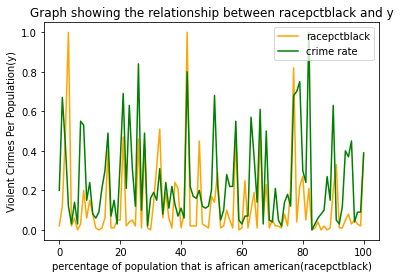

In [120]:
racepctblack = data.iloc[:101,7].values
racepctblack = racepctblack.reshape(-1, 1)
y = data.iloc[:101, -1].values

plt.plot(racepctblack, color='orange', label='racepctblack')
plt.plot(y, color='green', label='crime rate')
plt.title('Graph showing the relationship between racepctblack and y')
plt.xlabel('percentage of population that is african american(racepctblack)')
plt.ylabel('Violent Crimes Per Population(y)')

plt.legend()
plt.show()